<a href="https://colab.research.google.com/github/leee2682/pythonbasic/blob/main/20210608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.148
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.29
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [22]:
# 라이브러리 읽어 들이기
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [23]:
# 학숩 전용 데이터와 결과 준비하기
# x, y
learn_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
# x and y
learn_label = [0, 0, 0, 1]

In [24]:
# 알고리즘 지정하기
clf = LinearSVC()

In [25]:
# 학습 전용 데이터와 결과 학습하기
clf.fit(learn_data, learn_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
#테스트 데이터로 예측하기
test_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
test_label = clf.predict(test_data)

In [27]:
# 예측 결과 평가하기
print(test_data, "의 예측 결과 : ", test_label)
print("정답률 = ", accuracy_score([0, 0, 0, 1], test_label))

[[0, 0], [1, 0], [0, 1], [1, 1]] 의 예측 결과 :  [0 0 0 1]
정답률 =  1.0


In [28]:
# 라이브러리 읽어 들이기
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 학숩 전용 데이터와 결과 준비하기
# x, y
learn_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
# x and y
learn_label = [0, 1, 1, 0] # (*) xor 전용 레이블로 변경

# 알고리즘 지정하기 (LinearSVC)
clf = LinearSVC()

# 학습 전용 데이터와 결과 학습하기
clf.fit(learn_data, learn_label)

#테스트 데이터로 예측하기
test_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
test_label = clf.predict(test_data)

# 예측 결과 평가하기
print(test_data, "의 예측 결과 : ", test_label)
print("정답률 = ", accuracy_score([0, 1, 1, 0], test_label)) # (*) xor 전용 레이블로 변경

[[0, 0], [1, 0], [0, 1], [1, 1]] 의 예측 결과 :  [1 1 1 1]
정답률 =  0.5


In [29]:
####################### 불꽃 분류하기 ###################

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [43]:
# 불꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding = "utf-8")

In [44]:
# 불꽃 데이터를 레이블과 입력 데이터로 분리하기
y = iris_data.loc[:, "Name"]
x = iris_data.loc[:, ['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [45]:
# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, train_size = 0.8, shuffle = True)

In [46]:
# 학습하기
slf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# 평가하기
y_pred = clf.predict(x_test)
print('정답률 = ', accuracy_score(y_test, y_pred))

정답률 =  0.9333333333333333


In [48]:
from sklearn import datasets, svm

In [49]:
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu" + \
      "/ml/machine-learning-databases/wine-quality" + \
      "/winequality-white.csv"
savepath = "winequality-white.csv"
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x7f574def5450>)

In [50]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep = ";", encoding = "utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [61]:
# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep = ";", encoding = "utf-8")

In [62]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [63]:
# 데이터를 레이블과 데이터로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis = 1)

In [64]:
# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [65]:
# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률 = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.88      0.28      0.42        25
           5       0.78      0.71      0.74       313
           6       0.65      0.83      0.73       418
           7       0.74      0.56      0.64       184
           8       1.00      0.42      0.59        36
           9       0.00      0.00      0.00         1

    accuracy                           0.71       980
   macro avg       0.58      0.40      0.45       980
weighted avg       0.72      0.71      0.70       980

정답률 =  0.7071428571428572


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# 와인 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep = ";", encoding = "utf-8")

In [69]:
# 품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


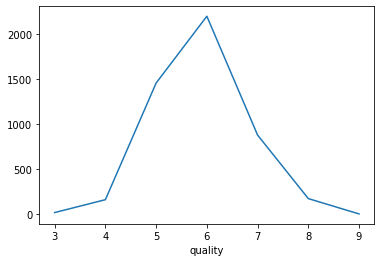

In [70]:
# 수를 그래프로 그리기
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [73]:
# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep = ";", encoding = "utf-8")

In [74]:
# 데이터를 레이블과 데이터로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis = 1)

In [75]:
# y 레이블 변경하기
newlist = []
for v in list(y):
  if v <= 4:
    newlist += [0]
  elif v <= 7:
    newlist += [1]
  else:
    newlist += [2]
y = newlist

In [76]:
# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [77]:
# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
# 평가하기
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률 = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.18      0.27        39
           1       0.95      0.99      0.97       903
           2       0.95      0.47      0.63        38

    accuracy                           0.94       980
   macro avg       0.83      0.55      0.62       980
weighted avg       0.93      0.94      0.93       980

정답률 =  0.9408163265306122


In [79]:
in_file = "data.csv"
out_file = "tem18y.csv"
# CSV 파일을 한 줄 씩 읽어 들이기
with open(in_file, "rt", encoding = "EUC_KR") as fr:
  lines = fr.readlines()

FileNotFoundError: ignored

In [ ]:
# 기존의 데이터를 분리해서 가공하기
lines = ["연, 월, 일, 기온, 품질, 균질\n"] + lines[5:]
lines = map(lambda v: v.replace('/', ','), lines)
result = "".join(lines).strip()
print(result)

In [ ]:
# 결과를 파일에 출력하기
with open(out_file, "wt", encoding = "utf-8") as fw:
  fw.write(result)
  print("saved.")